PCA对真实的手写数字识别数据集进行降维操作

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
x = digits.data
y = digits.target
x,y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 666)

In [4]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

CPU times: user 52 ms, sys: 10 ms, total: 62 ms
Wall time: 69.5 ms


KNeighborsClassifier()

In [5]:
knn_clf.score(x_test,y_test)

0.9866666666666667

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(x_train)
pca.components_

array([[ 7.94539572e-19, -1.95781316e-02, -2.17541271e-01,
        -1.15461017e-01, -6.54600097e-02, -1.58546316e-01,
        -4.56278535e-02, -2.15664138e-03, -4.16848067e-04,
        -1.09981444e-01, -1.94121025e-01,  1.40503554e-01,
        -8.30812491e-02, -2.36572004e-01, -5.21619529e-02,
         2.02338633e-03, -1.54452726e-04, -5.93106984e-02,
         1.56656850e-01,  1.79975310e-01, -2.36177396e-01,
        -1.71195523e-01,  2.28798055e-02,  3.31977283e-03,
         4.50903323e-05,  8.22701600e-02,  2.92413566e-01,
        -9.46656228e-02, -2.96102246e-01, -5.34392073e-02,
         5.56903479e-02,  1.52904796e-04, -0.00000000e+00,
         1.75843011e-01,  3.70199745e-01,  5.72398868e-02,
        -2.49417465e-02,  8.92334551e-02,  6.46062295e-02,
        -0.00000000e+00,  7.13268088e-04,  1.10370203e-01,
         3.43248659e-01,  1.27737889e-01,  4.87759647e-02,
         9.59260106e-02,  6.86983190e-02,  2.49589020e-03,
         1.53148145e-04, -3.27061393e-03,  3.43359174e-0

In [7]:
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [8]:
%%time
knn_clf.fit(x_train_reduction,y_train)

CPU times: user 1.28 ms, sys: 3.76 ms, total: 5.04 ms
Wall time: 677 µs


KNeighborsClassifier()

In [9]:
knn_clf.score(x_test_reduction,y_test)

0.6066666666666667

In [10]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [11]:
#指定需要保留原数据方差比例来自动决定选取的主成分个数
pca = PCA(0.95)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [12]:
%%time
knn_clf.fit(x_train_reduction,y_train)

CPU times: user 6.21 ms, sys: 2.35 ms, total: 8.56 ms
Wall time: 1.09 ms


KNeighborsClassifier()

In [13]:
knn_clf.score(x_test_reduction,y_test)

0.98

In [14]:
pca.n_components_

28

降噪处理

In [15]:
digits = datasets.load_digits()
x = digits.data
y = digits.target
x,y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [16]:
#人为加入噪声
x_noisy = x + np.random.normal(0,4,size = x.shape)
example_noisy = x_noisy[y==0,:][:10]
for num in range(1,10):
    x_num = x_noisy[y==num,:][:10]
    example_noisy = np.vstack([example_noisy,x_num])
example_noisy.shape

(100, 64)

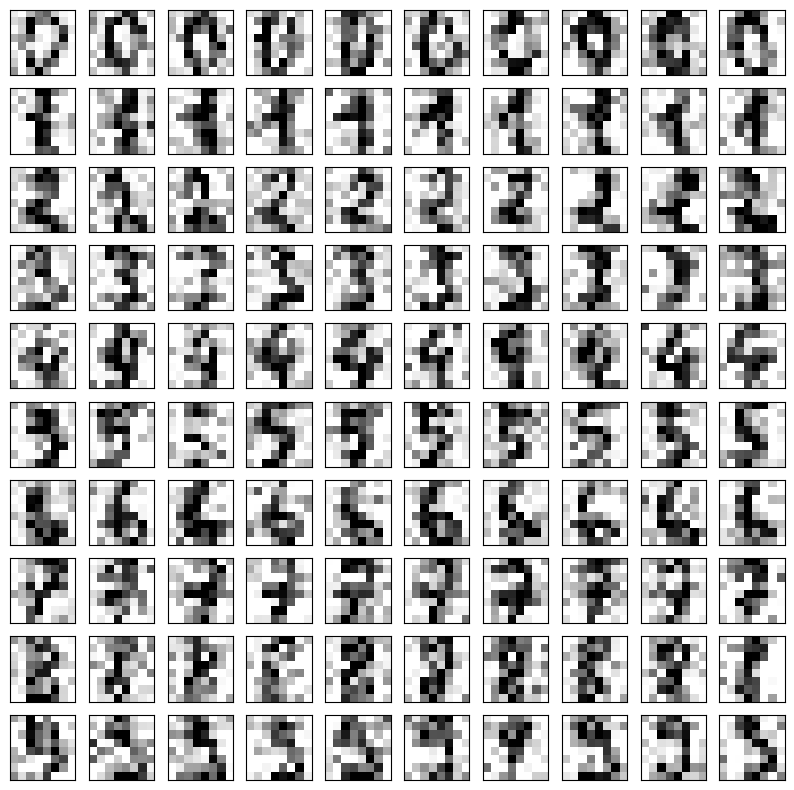

In [17]:
def plot_digits(data):
    fig,axes = plt.subplots(10,10,figsize = (10,10),subplot_kw = {'xticks':[],'yticks':[]})
    gridspec_kw = dict(hspace=0.1,wspace=0.1)
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
    plt.show()
plot_digits(example_noisy)

In [18]:
#降噪
pca = PCA(0.5)
pca.fit(x_noisy)
pca.n_components_

12

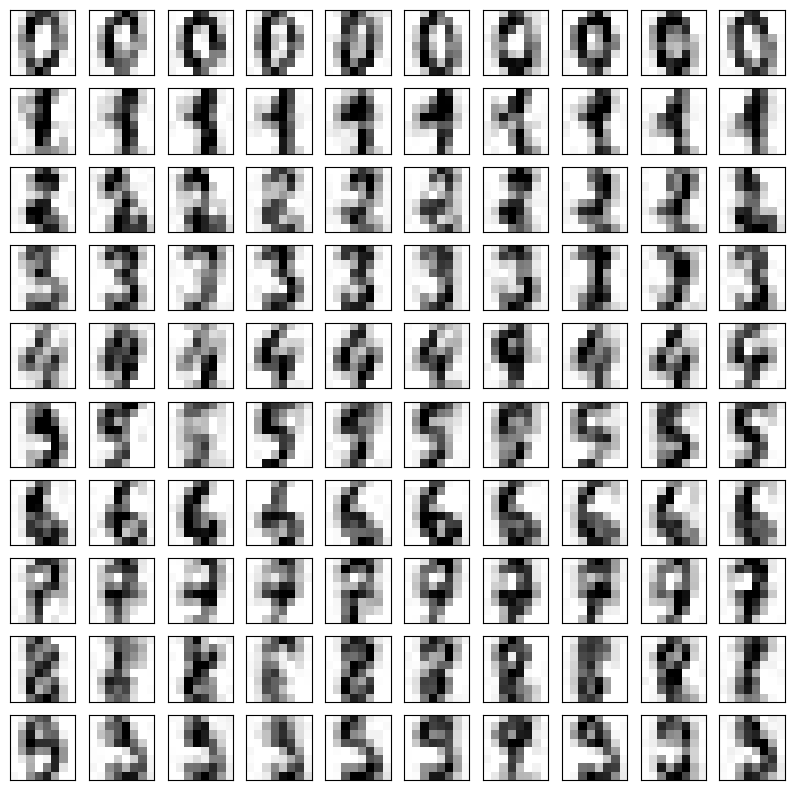

In [19]:
example_noisy_reduction  = pca.transform(example_noisy)
example_noisy_restore  = pca.inverse_transform(example_noisy_reduction)
plot_digits(example_noisy_restore)